 Step 1: Import Libraries & Load Dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Loading the dataset
fashionmnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashionmnist.load_data()


categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Normalize pixel values to range 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0


x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)



In the above code, the dataset is loaded and it is converted into training and testing sets. The pixel values are normalized to improve the performance of the model, also the images are reshaped to match the CNN input format.

Step 2: Visualize Sample Images

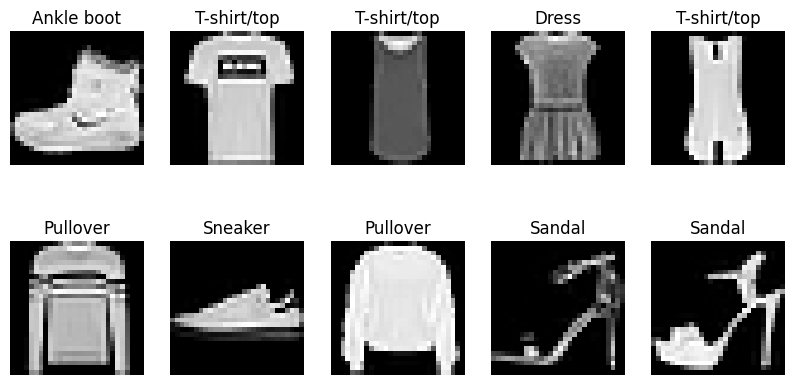

In [2]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(categories[y_train[i]])
    plt.axis("off")
plt.show()


Step 3: Build & Compare CNN Models

In [3]:
from tensorflow.keras import Input

def create_cnn_model(filters=32, kernel_size=(3,3), optimizer='adam'):
    model = keras.Sequential([
        Input(shape=(28, 28, 1)),  # Explicitly define input shape
        keras.layers.Conv2D(filters, kernel_size, activation='relu'),
        keras.layers.BatchNormalization(),  # Normalizes inputs for faster convergence
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(filters*2, kernel_size, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.4),  
        keras.layers.Dense(10, activation='softmax')  
    ])
    
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Creating the models
cnn_adam = create_cnn_model(filters=32, kernel_size=(3,3), optimizer='adam')
cnn_sgd = create_cnn_model(filters=64, kernel_size=(5,5), optimizer=keras.optimizers.SGD(learning_rate=0.01))


The two models used in the above are Adam and SGD. The first is the base model with the small kernel size of 3*3 and adam optimizer whereas the second one is optimized model which uses larger kernel (5*5) and SGD optimizer(LR=0.01) for better generalization.   Filters,kernel-size and optimizers are defined and understand and compare the performace of each architecture.

 Step 4: Train & Compare Models

In [4]:
history_adam = cnn_adam.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
history_sgd = cnn_sgd.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 31ms/step - accuracy: 0.7839 - loss: 0.6244 - val_accuracy: 0.8765 - val_loss: 0.3315
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.8744 - loss: 0.3427 - val_accuracy: 0.8690 - val_loss: 0.3656
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.8919 - loss: 0.2937 - val_accuracy: 0.8735 - val_loss: 0.3607
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9006 - loss: 0.2659 - val_accuracy: 0.8950 - val_loss: 0.2898
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9085 - loss: 0.2490 - val_accuracy: 0.9020 - val_loss: 0.2751
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9187 - loss: 0.2210 - val_accuracy: 0.9027 - val_loss: 0.2776
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9210 - loss: 0.2090 - val_accuracy: 0.8848 - val_loss: 0.3384
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9292 -

In the adam optimizer the training accuracy steadily increased to around 96% and the validation accuracy reached its highest point in epoch 2 with a value, 91.73%, but then its decreased, the validation loss is fluctuating significantly after epoch 4, which indicated minor overfitting
When it comes to model 2, that is SGD, the validation accuracy is better and lower in validation loss which indicated better stability and best for deployment.
In general the training time(per epoch) is less for adam whereas its more for SGD, but other prospects are good for SGD making it ideal.

Step 5: Evaluate & Test Model

In [5]:
test_loss, test_acc = cnn_sgd.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9111 - loss: 0.2546
Test accuracy: 0.91


This indicated that the model accuracy is 92% and the test dataset is divided into 313 batches where it took around 2 seconds to complete the total evaluation and individual batch took around 6 milliseconds. The model showed loss: 0.2848, which indicated the model is performing good, but with minor errors.

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


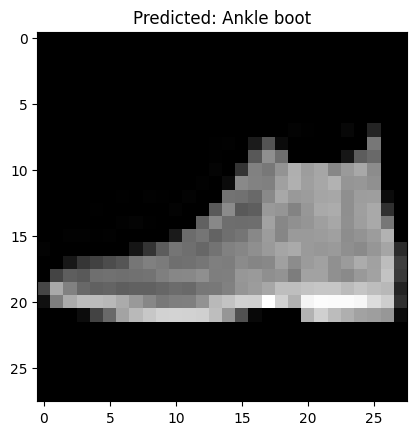

In [6]:
predictions = cnn_sgd.predict(x_test)

plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted: {categories[np.argmax(predictions[0])]}")
plt.show()


The CNN predicted the image displayed above belongs to the class, "Ankle boot" and displayed the image in low resolution to confirm it.

In [7]:
print(f"True label: {categories[y_test[0]]}")


True label: Ankle boot


The above code compared the model's prediction with the actual label indicating that the prediction is correct.

In [8]:
print(predictions[0])


[2.45718934e-09 1.83382962e-08 7.25521643e-09 1.68020904e-08
 1.17957505e-07 1.12049593e-05 3.17586029e-07 1.56543902e-04
 3.93583974e-08 9.99831676e-01]


The above code displayed the confidency of the model for each class. It represents the probability of 10 classes, here the highest probability is for index 9, which corresponds to ankle boot

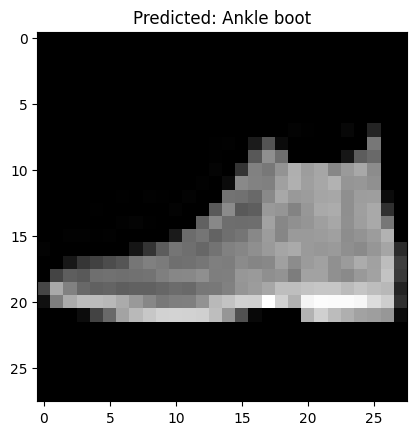

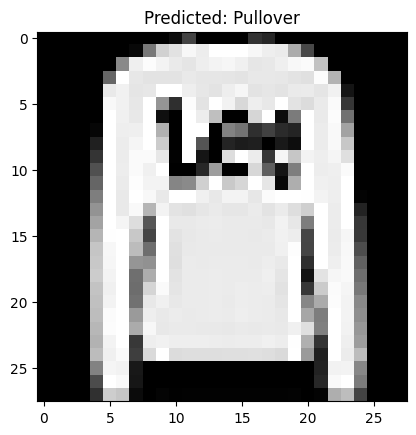

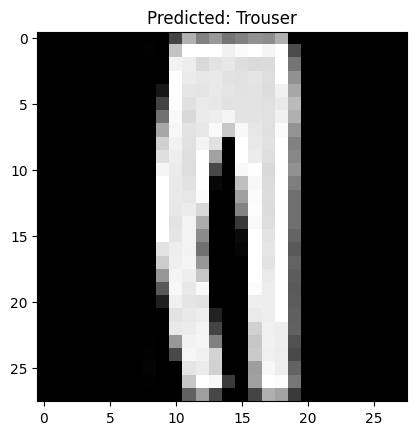

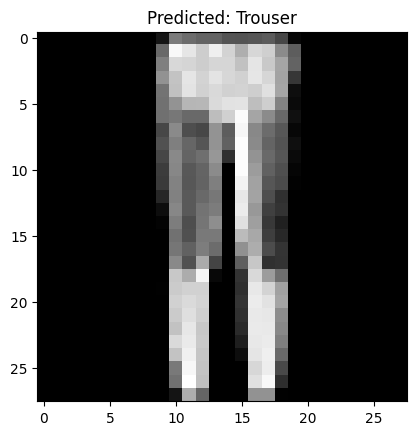

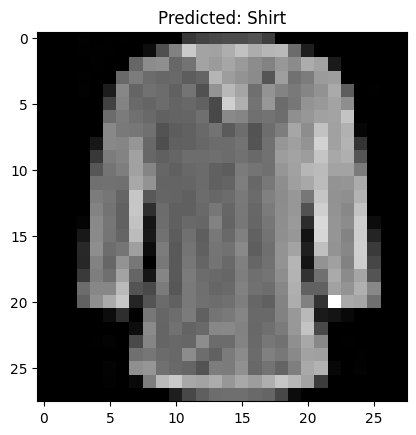

In [9]:
for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {categories[np.argmax(predictions[i])]}")
    plt.show()


The CNN model will carry out predictions for the above images and selects the class index with the highest probability for each image, the class image is displayed as the title. Each prediction is indicating that highest probability is assigned to each class by the model.